In [1]:
%matplotlib inline
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
import numpy as np
import matplotlib.pyplot as plt

In [9]:
x = np.arange(0,5,0.00001)
y = np.power(x,3)+2*np.power(x,2)-3*x-1

## one layer and one neuron
purple is the original function
red is predict line

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
15625/15625 [==============================] - 15s 978us/step - loss: 2000.8762 - accuracy: 0.0000e+00
Epoch 2/10
15625/15625 [==============================] - 13s 838us/step - loss: 707.6776 - accuracy: 0.0000e+00
Epoch 3/10
15625/15625 [==============================] - 12s 793us/step - loss: 488.2853 - accuracy: 0.0000e+00
Epoch 4/10
15625/15625 [==============================] - 13s 824us/step - loss: 374.5026 - accuracy: 0.0000e+00
Epoch 5/10
15625/15625 [==============================] - 13s 811us/step - loss: 331.8436 - accuracy: 0.0000e+00
Epoch 6/10
15625/15625 [==============================] - 13s 823us/step - loss: 321.493

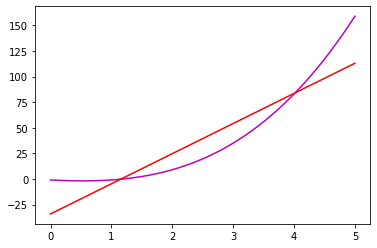

In [10]:
model = Sequential()
model.add(Dense(1,input_shape=(1,)))
model.summary()
model.compile(optimizer='RMSprop',loss='mse',metrics=['accuracy'])
model.fit(x,y,epochs=10)
pre_y = model.predict(x)

fig , ax = plt.subplots()
ax.plot(x,y,'m',x,pre_y,'r')

## two layers and neuron is 5,1

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 5)                 10        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
15625/15625 [==============================] - 16s 1ms/step - loss: 585.0302 - accuracy: 0.0000e+00
Epoch 2/10
15625/15625 [==============================] - 16s 1ms/step - loss: 319.0919 - accuracy: 0.0000e+00
Epoch 3/10
15625/15625 [==============================] - 17s 1ms/step - loss: 319.0742 - accuracy: 0.0000e+00
Epoch 4/10
15625/15625 [==============================] - 16s 1ms/step - loss: 319.0900 - accuracy: 0.0000e+00
Epoch 5/10
15625/15625 [==============================] - 20s 1ms/step - los

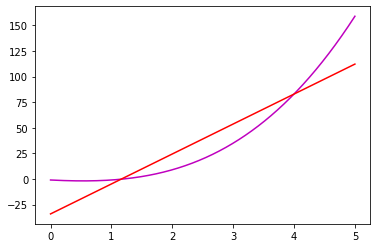

In [11]:
model = Sequential()
model.add(Dense(5,input_shape=(1,)))
model.add(Dense(1))
model.summary()
model.compile(optimizer='RMSprop',loss='mse',metrics=['accuracy'])
model.fit(x,y,epochs=10)
pre_y = model.predict(x)

fig , ax = plt.subplots()
ax.plot(x,y,'m',x,pre_y,'r')

## adding more neurons

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 300)               600       
_________________________________________________________________
dense_17 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 1005      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 12        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 3         
Total params: 61,820
Trainable params: 61,820
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
15625/15625 [==============================] - 47s 3ms/step - loss: 15.0603 - accuracy: 0.0000e+00
Epoch 

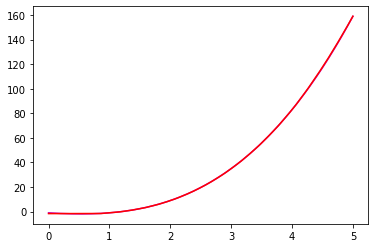

In [14]:
model = Sequential()
model.add(Dense(300,input_shape=(1,), activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(2))
model.add(Dense(1))
model.summary()
model.compile(optimizer='RMSprop',loss='mse',metrics=['accuracy'])
model.fit(x,y,epochs=10)
pre_y = model.predict(x)

fig , ax = plt.subplots()
ax.plot(x,y,'m',x,pre_y,'r')

In [15]:
from sklearn import datasets

circles_data , circles_data_labels = datasets.make_circles(n_samples=50,factor=0.1,noise=0.1)



In [16]:
model = Sequential()
model.add(Dense(8,input_shape=(2,), activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics =['accuracy'])
model.fit(circles_data,circles_data_labels,epochs=1000)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_22 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 22        
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
2/2 [==============================] - 0s 5ms/step - loss: 0.6993 - accuracy: 0.5000
Epoch 2/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5000
Epoch 3/1000
2/2 [==============================] - 0s 1ms/step - loss: 0.6968 - accuracy: 0.5200
Epoch 4/1000
2/2 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0

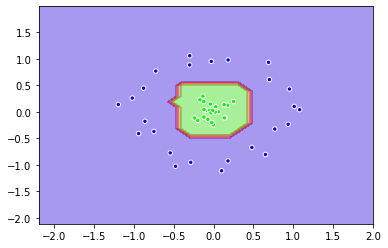

In [17]:
x_min, x_max = circles_data[:, 0].min() - 1, circles_data[:, 0].max() + 1
y_min, y_max = circles_data[:, 1].min() - 1, circles_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
#print(Z)
n_Z = []
for xcc in range(len(Z)):
    if(Z[xcc][0]>Z[xcc][1]):
        n_Z.append(0)
    else:
        n_Z.append(1)
#print(n_Z)
Z = np.array(n_Z)

Z = Z.reshape(xx.shape)
fig , ax = plt.subplots()
ax.contourf(xx, yy, Z, alpha=0.4, cmap="brg")
ax.scatter(circles_data[:, 0], circles_data[:, 1], c=circles_data_labels, cmap="brg",s=20, edgecolor='w')
plt.show()
